# Проект: Машинное обучение в бизнесе

## Выбор локации для скважины

### Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Шаги для выбора локации обычно такие:

* В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
* Строят модель для предсказания объёма запасов в новых скважинах;
* Выбирают скважины с самыми высокими оценками значений;
* Определяют регион с максимальной суммарной прибылью отобранных скважин.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

### Инструкция по выполнению проекта

1. Загрузите и подготовьте данные. Поясните порядок действий.
2. Обучите и проверьте модель для каждого региона:

    2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
    
    2.2. Обучите модель и сделайте предсказания на валидационной выборке.
    
    2.3. Сохраните предсказания и правильные ответы на валидационной выборке.
    
    2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
    
    2.5. Проанализируйте результаты.
    
3. Подготовьтесь к расчёту прибыли:

    3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
    
    3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.
    
    3.3. Напишите выводы по этапу подготовки расчёта прибыли.
    
4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

    4.1. Выберите скважины с максимальными значениями предсказаний.
    
    4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
    
    4.3. Рассчитайте прибыль для полученного объёма сырья.
    
5. Посчитайте риски и прибыль для каждого региона:

    5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
    
    5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
    
    5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.
    
### Описание данных
Данные геологоразведки трёх регионов находятся в файлах:
* /datasets/geo_data_0.csv
* /datasets/geo_data_1.csv
* /datasets/geo_data_2.csv
* id — уникальный идентификатор скважины;
* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
* product — объём запасов в скважине (тыс. баррелей).
#### Условия задачи:
* Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
* Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

# 1. Загрузка данных

In [85]:
# Импортируем необходимые библиотеки

import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import numpy as np

from numpy.random import RandomState
from scipy import stats as st

import seaborn as sns

import sweetviz as sv


In [86]:
# Читаем данные из файлов
try:
    data_1 = pd.read_csv('datasets/geo_data_0.csv')
    data_2 = pd.read_csv('datasets/geo_data_1.csv')
    data_3 = pd.read_csv('datasets/geo_data_2.csv')
except:
    data_1 = pd.read_csv('/datasets/geo_data_0.csv')
    data_2 = pd.read_csv('/datasets/geo_data_1.csv')
    data_3 = pd.read_csv('/datasets/geo_data_2.csv')  
    
# Смотрим на данные
display(data_1, data_2, data_3)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [89]:
# EDA-анализ с помощью новой библиотеки sweetviz
df = pd.read_csv('datasets/geo_data_0.csv')

report = sv.analyze([df, " Permit Logs"])

report.show_html('common analysis.html')

                                             |          | [  0%]   00:00 -> (? left)

Report common analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:100: execution error: Файл некий объект не найден. (-43)


In [56]:
# Посмотрим на основные параметры сетов
display(data_1.describe())
display(data_2.describe())
display(data_3.describe())

display(data_1.info())
display(data_2.info())
display(data_3.info())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [57]:
#Посмотрим сколько нулевых скважин

print(data_1.query('product == 0')['product'].count())
print(data_2.query('product == 0')['product'].count())
print(data_3.query('product == 0')['product'].count())

1
8235
1


**Пустых значений нет. Типы данных в порядке. Во втором регионе много скважин с нулевым объемом сырья**

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


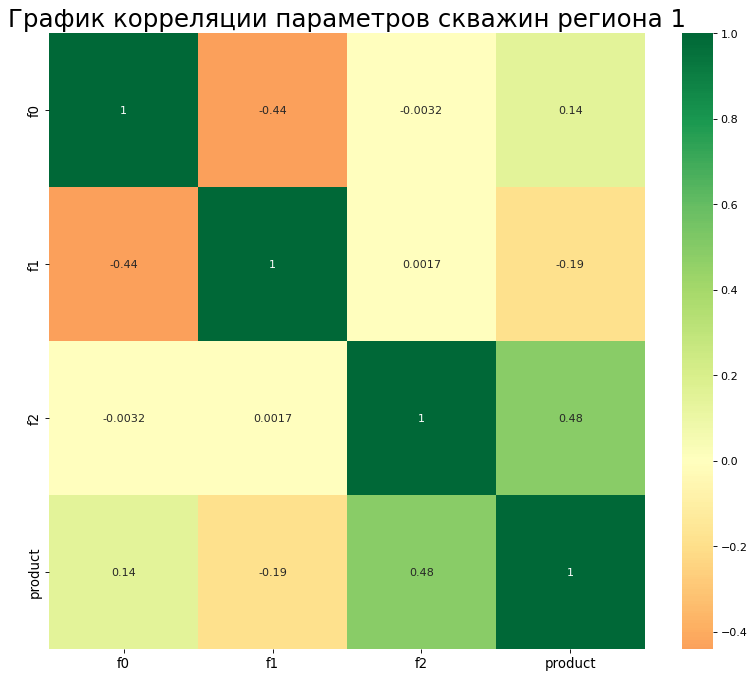

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


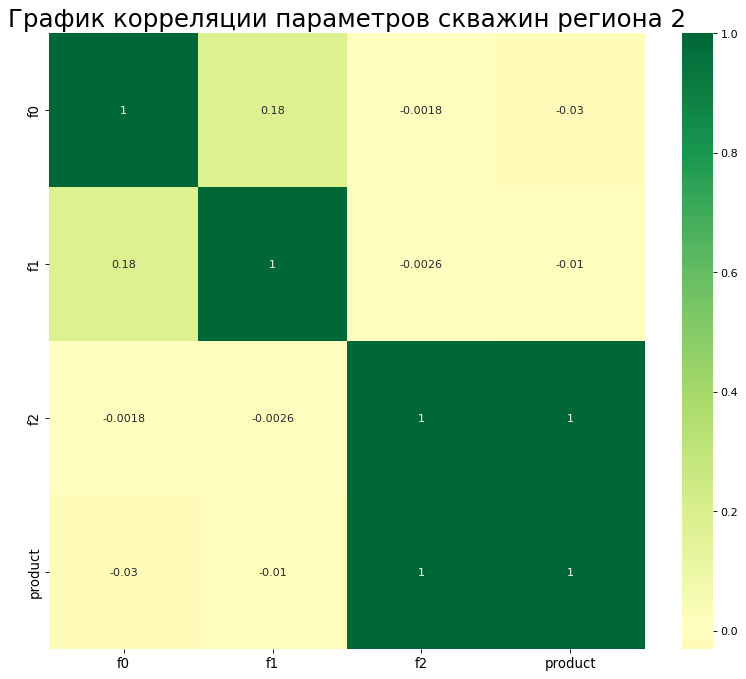

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


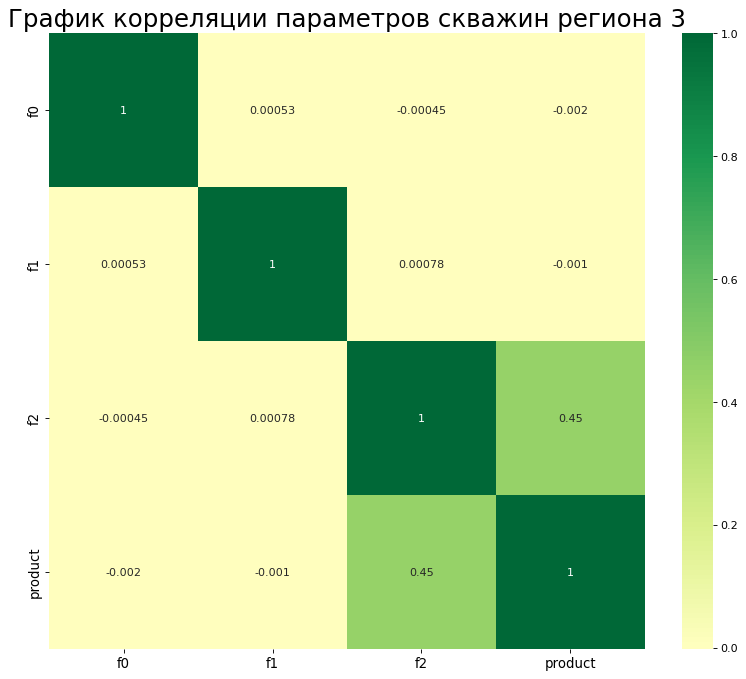

In [58]:
# Рассчитаем корреляцию параметров скважие первого региона
display(data_1.corr())

#Построим график корреляции параметров
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data_1.corr(), xticklabels=data_1.corr().columns, yticklabels=data_1.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('График корреляции параметров скважин региона 1', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Рассчитаем корреляцию параметров скважие второго региона
display(data_2.corr())

#Построим график корреляции параметров
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data_2.corr(), xticklabels=data_2.corr().columns, yticklabels=data_2.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('График корреляции параметров скважин региона 2', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Рассчитаем корреляцию параметров скважие третьего региона
display(data_3.corr())

#Построим график корреляции параметров
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data_3.corr(), xticklabels=data_3.corr().columns, yticklabels=data_3.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('График корреляции параметров скважин региона 3', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Во втором реионе наблюдается сильная корреляция между предсказанными значениями сырья и параметром f2. Остальные значения имеют слабую корреляцию.**

## 2. Обучение модели

In [59]:
model = LinearRegression()

# Напишем функцию обучения модели
def model_region(data, region):    
    rmse_sum = []
    features = data.drop(['product'], axis=1)
    target = data['product']

    features = features.drop(['id'], axis=1)
    
# Разбъем данные на обучающую и валидационную выборки в соотношении 75:25
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=42) # отделяем 25% данных для валидационной выборки. Используем статификацию.
    
    model.fit(features_train, target_train) # обучаем модель на тренировочной выборке
    target_predict = model.predict(features_valid) # сохраняем предсказания модели на валидационых данных
    # Кладем в словарь
    data = {'product' : target_valid,
            'predicted' : target_predict}    
    
    data = pd.DataFrame(data, columns = ['product', 'predicted'])
    mse = mean_squared_error(target_valid, target_predict) # посчитайте значение метрики MSE на валидационной выборке
    rmse = mean_squared_error(target_valid, target_predict)**0.5 # посчитайте значение метрики RMSE на валидационной выборке
    print("MSE =", mse)
    print("RMSE =", mse ** 0.5)
    product_mean = target_predict.mean()
    product_sum = target_predict.sum()
    print(f"{region}: Средний запас сырья ", product_mean)
    print(f"{region}: Суммартный запас сырья ", product_sum)
    print()
    
    return(rmse, data, product_sum, product_mean)

In [60]:
rmse_region_1, data_region_1, product_sum_1, product_mean_1 = model_region(data_1, "Регион 1")
rmse_region_2, data_region_2, product_sum_2, product_mean_2 = model_region(data_2, "Регион 2")
rmse_region_3, data_region_3, product_sum_3, product_mean_3 = model_region(data_3, "Регион 3")


MSE = 1425.5608700093812
RMSE = 37.75660035026169
Регион 1: Средний запас сырья  92.39879990657768
Регион 1: Суммартный запас сырья  2309969.997664442

MSE = 0.7925986566392017
RMSE = 0.8902801001028843
Регион 2: Средний запас сырья  68.71287803913762
Регион 2: Суммартный запас сырья  1717821.9509784407

MSE = 1611.6910636385903
RMSE = 40.145872311342174
Регион 3: Средний запас сырья  94.77102387765939
Регион 3: Суммартный запас сырья  2369275.5969414846



**Вывод: RMSE модели второго региона значительно меньше, чем первого и третьего, однако суммарный и средний запас сырья намного меньше. Вероятно, что второй регион не подойдет для разработки.**

In [61]:
# Объедимим все в один датафрейм

data = pd.concat([data_region_1, data_region_2, data_region_3], axis=1)
data

,product,predicted,product,predicted,product,predicted
75721,122.073350,101.901017,0.000000,0.844738,117.441301,98.301916
80184,48.738540,78.217774,53.906522,52.921612,47.841249,101.592461
19864,131.338088,115.266901,134.766305,135.110385,45.883483,52.449099
76699,88.327757,105.618618,107.813044,109.494863,139.014608,109.922127
92991,36.959266,97.980185,0.000000,-0.047292,84.004276,72.411847
...,...,...,...,...,...,...
21271,148.821520,105.076959,107.813044,108.351600,40.797226,102.764169
34014,123.454003,74.768176,53.906522,53.604049,87.144239,93.431823
81355,91.945213,82.544397,26.953261,26.708734,52.039812,64.098390
65720,149.295563,81.826689,110.992147,109.823087,136.961454,83.764135


In [62]:
# Переименуем колонки

data.columns = ['product_1', 'predicted_1','product_2','predicted_2','product_3','predicted_3']
data


,product_1,predicted_1,product_2,predicted_2,product_3,predicted_3
75721,122.073350,101.901017,0.000000,0.844738,117.441301,98.301916
80184,48.738540,78.217774,53.906522,52.921612,47.841249,101.592461
19864,131.338088,115.266901,134.766305,135.110385,45.883483,52.449099
76699,88.327757,105.618618,107.813044,109.494863,139.014608,109.922127
92991,36.959266,97.980185,0.000000,-0.047292,84.004276,72.411847
...,...,...,...,...,...,...
21271,148.821520,105.076959,107.813044,108.351600,40.797226,102.764169
34014,123.454003,74.768176,53.906522,53.604049,87.144239,93.431823
81355,91.945213,82.544397,26.953261,26.708734,52.039812,64.098390
65720,149.295563,81.826689,110.992147,109.823087,136.961454,83.764135


**Данные в колонках имеют одну размерность. Нормализация не требуется**

## 3. Расчет прибыли

In [63]:
# Все ключевые значения для расчётов сохраним в отдельных переменных

budget = 10000000 # Бюджет на разработку = 10 млрд. Так как значения в тысячах, отнимаем 3 нуля
_500_points = 500 # Количество скважин для разведки региона
_200_points = 200  # Количество скважин для разработки
profit_per_barrel = 450 # Прибыль с одного барреля


### 3.2 Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины

In [64]:
profit_point_product_rub = budget / _200_points # Точка безубыточности. Столько в среднем должна приносить прибыли одна из топовых скважин, чтобы покрыть убытки. За тысячу баррелей
volume_per_point_bar = profit_point_product_rub / profit_per_barrel # Столько в среднем тысяч баррелей должно быть в одной скважине

product_avg_region = budget / profit_per_barrel # Достаточный объем сырья на регион

print(f"Прибыль на топовую точку должна быть не менее {profit_point_product_rub:0.2f} рублей")
print(f"Средний объем сырья на одну скважину для безубыточности {volume_per_point_bar:0.2f} тысяч баррелей")
print(f"Средний объем сырья на регион должен составить не менее {product_avg_region:0.2f} тысяч баррелей")

# Сравним полученный объём сырья со средним запасом в каждом регионе
print(f"\nСредний запас скважины в регионе 1: {data.predicted_1.mean():0.2f} тысяч баррелей")
print(f"Средний запас скважины в регионе 2: {data.predicted_2.mean():0.2f} тысяч баррелей")
print(f"Средний запас скважины в регионе 3: {data.predicted_3.mean():0.2f} тысяч баррелей")

Прибыль на топовую точку должна быть не менее 50000.00 рублей
Средний объем сырья на одну скважину для безубыточности 111.11 тысяч баррелей
Средний объем сырья на регион должен составить не менее 22222.22 тысяч баррелей

Средний запас скважины в регионе 1: 92.40 тысяч баррелей
Средний запас скважины в регионе 2: 68.71 тысяч баррелей
Средний запас скважины в регионе 3: 94.77 тысяч баррелей


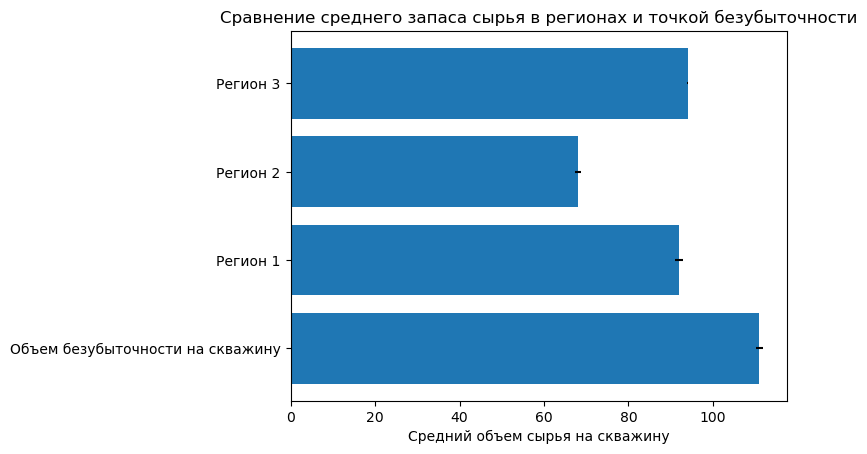

In [65]:
# Строим график сравнения среднего запаса сыпья по регионам

plt.rcdefaults()
fig, ax = plt.subplots()

volume = ('Объем безубыточности на скважину', 'Регион 1', 'Регион 2', 'Регион 3')
y_pos = np.arange(len(volume))

performance = [int(volume_per_point_bar), int(data.predicted_1.mean()), int(data.predicted_2.mean()), int(data.predicted_3.mean())]

error = np.random.rand(len(volume))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=volume)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Средний объем сырья на скважину')
ax.set_title('Сравнение среднего запаса сырья в регионах и точкой безубыточности')

plt.show()



**Вывод: Как видно из графика, средний объем скважины для безубыточной добычи больше, чем средние объемы скважин во всех регионах. Поэтому будем искать наиболее перспективные скважины, чтобы выйти в прибыль.
Стоит отметить, что во втором регионе много значений с нулевым объемом сырья, так же там значсительно ниже средний запас.**

## 4. Расчет прибыли по выбранным скважинам и предсказаниям модели:

4.1. Выберите скважины с максимальными значениями предсказаний.

4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.

4.3. Рассчитайте прибыль для полученного объёма сырья.



In [66]:
# Все задачи этого раздела возложим на функцию подсчета прибыли в регионе. На вход ф-ция принимает реальные и предсказанные запасы сырья, количество скважин, прибыль с одного барреля

def profit(product, predicted, count, profit_per_barrel):
    
    # Сортируем скважины по значениям предсказаний
    predicted_sorted = predicted.sort_values(ascending=False)
    # Выбираем скважины с максимальными значениями предсказаний
    selected = product[predicted_sorted.index][:count]  
    
    # Найдем прибыль по полученным скважинам. Для этого сумму реальных запасов умножаем на стоимость барреля и отнимаем бюждет на разработу 200 скважин. 200 потому что передавать в функцию будем это значение.
    profit = selected.sum() * profit_per_barrel - budget
    # Вернем прибыль с полученных скважин
    return profit


## 5. Посчитайте риски и прибыль для каждого региона:

5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [83]:
state = RandomState(12345)

def bootstrap_200_points(data, region):
        
    values = []
    for i in range(1000):
        subsample = data.sample(n=_500_points, replace=True, random_state=state) # Сформируем подвыборку с 500 скважинами из общего сета
        # По входящему параметру будем определять регион и формировать по нему выборку
        if region == 1:
            prod = subsample.product_1
            pred = subsample.predicted_1
        elif region ==2:
            prod = subsample.product_2
            pred = subsample.predicted_2
        elif region == 3:
            prod = subsample.product_3
            pred = subsample.predicted_3

        profit_region = profit(prod, pred, _200_points, profit_per_barrel)
        values.append(profit_region)

    values = pd.Series(values)  
    lower = values.quantile(0.025) # Нижний квантиль
    upper = values.quantile(0.975) # Верхний квантиль
    average = values.mean() # Средняя прибыль
    risk = (values < 0).mean()
    # Выводим данные по региону. Возвращать ничего не будем
    print(f'Регион {region}')
    print(f'Средняя прибыль по региону {region} = {average:.2f} тыс. руб.')
    print(f'95%-ый доверительный интервал: от {lower:.2f} до {upper:.2f} тыс. руб.')
    print(f'Риск {risk:.2%}')
    print("")
    



In [84]:
# Запускаем подсчеты для каждого региона
bootstrap_200_points(data, 1)
bootstrap_200_points(data, 2)
bootstrap_200_points(data, 3)



Регион 1
Средняя прибыль по региону 1 = 435933.77 тыс. руб.
95%-ый доверительный интервал: от -116231.61 до 966504.18 тыс. руб.
Риск 6.10%

Регион 2
Средняя прибыль по региону 2 = 498569.02 тыс. руб.
95%-ый доверительный интервал: от 75315.57 до 911503.70 тыс. руб.
Риск 1.00%

Регион 3
Средняя прибыль по региону 3 = 412672.90 тыс. руб.
95%-ый доверительный интервал: от -158939.52 до 978191.20 тыс. руб.
Риск 7.00%



**Вывод: Условию риска не более 2.5% соответствует только 2-ой регион. Несмотря на то, что средний запас скважины в регионе 2 - 68.71 тысяча барреле, что намного ниже, чем в первом и третьем регионах, RMSE модели намного меньше (0,89) и риски намного меньше (примерно 1%). Так что с заданной по условию вероятностью, разработка региона 2 окажется прибыльной. Регионы 1 и 3 отбрасываем по несоответствию требованиям проекта (риски выше 2.5%)**